In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
def time_converter(data, minute=False):
    x = data.split('-')
    if len(x)==1:
        d = 0
        x = x[0]
    else:
        d = int(x[0])
        x = x[1]
    h,m,s = map(int,x.split(':'))
    if minute == True:
        return (d*24 + h)*60 + m + s/60
    return ((d*24 + h)*60+m)*60+s

In [3]:
df = pd.read_excel('xnat_accre_full_stats.xlsx')

In [4]:
df.head()

,jobstartdate,jobSubmitDate,id,proctype,memused,input(MB),output(MB),walltime(min),JobID,Submit,...,ExitCode,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList
0,2018-01-01,2017-12-22,VUIISXNAT02_E226662,MaCRUISE_Parcel_v2,4631908,7.0,253.0,408.316667,23101185,2018-01-01T15:01:37,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp1044
1,2018-01-01,2017-12-22,VUIISXNAT02_E226752,MaCRUISE_Parcel_v2,4212364,5.9,198.0,238.000000,23101253,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp201
2,2018-01-01,2017-12-22,VUIISXNAT02_E226788,MaCRUISE_Parcel_v2,4146228,5.4,198.0,236.700000,23101254,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp202
3,2018-01-01,2017-12-22,VUIISXNAT02_E226806,MaCRUISE_Parcel_v2,4432564,7.6,220.0,287.683333,23101255,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp205
4,2018-01-01,2017-12-22,VUIISXNAT02_E226824,MaCRUISE_Parcel_v2,3963128,6.6,158.0,154.983333,23101252,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp211


In [5]:
df['ReqMem_num'] = pd.to_numeric(df['ReqMem'].map(lambda x: x.rstrip('MnG')))

In [6]:
df['Timelimit_num'] = df['Timelimit'].astype(str)
df['Timelimit_num'] = df.Timelimit_num.apply(time_converter)

### Read the timeout log and plot timeout runs compared to application behavior

In [7]:
dataset = "dtiQA_v3"
data = pd.Series(np.loadtxt("../workload/ACCRE/"+dataset+".out", delimiter=' '))

In [18]:
old_data = pd.read_csv("./%s_2016.csv" %(dataset))
old_data["memused"] = old_data["input(MB)"] + old_data["output"]
old_data['walltime_min'] = old_data['walltime'].astype(str)
old_data['walltime_min'] = old_data.walltime_min.apply(time_converter, minute=True)
old_data.head()

,walltime,input(MB),output,memused,walltime_min
0,02:10:47,2.1,32.0,34.1,130.783333
1,02:52:49,2.1,32.0,34.1,172.816667
2,03:43:13,5.0,0.0,5.0,223.216667
3,03:01:37,7.2,32.0,39.2,181.616667
4,02:20:27,7.4,30.0,37.4,140.450000


In [11]:
reqtime = df[df.proctype == dataset]['Timelimit_num'].unique() # in seconds
reqmem = df[df.proctype == dataset]['ReqMem_num'].unique() # in GB
df[df.proctype == dataset].head()

,jobstartdate,jobSubmitDate,id,proctype,memused,input(MB),output(MB),walltime(min),JobID,Submit,...,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,ReqMem_num,Timelimit_num
4901,2018-01-25,2018-01-25,VUIISXNAT04_E01586,dtiQA_v3,1829516,21.0,32.0,206.283333,24057614,2018-01-26T01:05:24,...,1,1,1,9Gn,NaN,"cpu=1,mem=9G,node=1",1-00:00:00,vmp1071,9,86400
5074,2018-02-09,2018-02-09,VUIISXNAT04_E04325,dtiQA_v3,1157352,24.0,31.0,198.900000,24558916,2018-02-09T18:03:32,...,1,1,1,9Gn,NaN,"cpu=1,mem=9G,node=1",1-00:00:00,vmp1019,9,86400
5188,2018-02-15,2018-02-15,VUIISXNAT04_E10085,dtiQA_v3,5542116,21.0,32.0,150.133333,24838462,2018-02-15T18:04:43,...,1,1,1,9Gn,NaN,"cpu=1,mem=9G,node=1",1-00:00:00,vmp1057,9,86400
5194,2018-02-15,2018-02-15,VUIISXNAT04_E10117,dtiQA_v3,1193076,27.0,31.0,154.516667,24838467,2018-02-15T18:04:43,...,1,1,1,9Gn,NaN,"cpu=1,mem=9G,node=1",1-00:00:00,vmp205,9,86400
5210,2018-02-16,2018-02-09,VUIISXNAT04_E04465,dtiQA_v3,1172636,25.0,31.0,202.566667,24883513,2018-02-17T02:04:52,...,1,1,1,9Gn,NaN,"cpu=1,mem=9G,node=1",1-00:00:00,vmp1020,9,86400


In [12]:
df['memused'] = df['memused'].astype(str)
df = df[df.memused.apply(lambda x: x.isnumeric())]

In [13]:
df['memused'] =  pd.to_numeric(df['memused']) / 1024

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


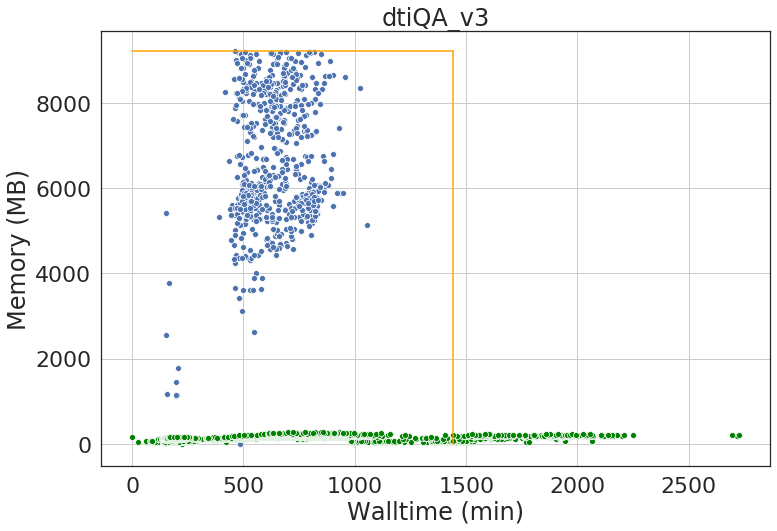

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.scatterplot(y="memused", x="walltime(min)",
                     data=df[df.proctype == dataset])

ax = sns.scatterplot(y="memused", x="walltime_min",
                     data=old_data,
                     color = 'green')

# set the request times
for i in reqtime:
    # time in database is in min
    plt.plot([i/60, i/60], [0, max(reqmem)*1024], color='orange')
for i in reqmem:
    plt.plot([0, max(reqtime)/60], [i*1024, i*1024], color='orange')

plt.grid(True)
ax.set_xlabel('Walltime (min)')
ax.set_ylabel('Memory (MB)')
ax.set_title(dataset)

plt.savefig("figures/%s.png" %(dataset))
plt.show()